**Import**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Wholesale customers data.csv')
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


**Preprocess the Data**

In [ ]:

categorical_features = ['Channel', 'Region']
numerical_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


X_categorical = data[categorical_features]
X_numerical = data[numerical_features]

encoder = OneHotEncoder(drop='first', sparse=False)
X_categorical_encoded = encoder.fit_transform(X_categorical)


scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

X_processed = np.hstack((X_numerical_scaled, X_categorical_encoded))

print(f"Processed data shape: {X_processed.shape}")


Processed data shape: (440, 9)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Apply K-Means Clustering**

In [ ]:

n_clusters = 3


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_processed)

data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3039725983089613


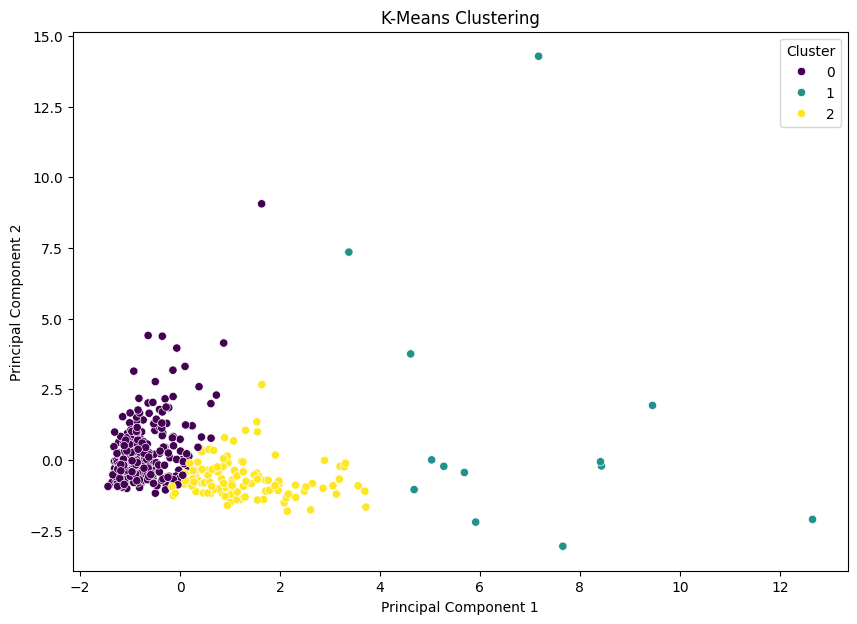

In [ ]:

silhouette_avg = silhouette_score(X_processed, clusters)
print(f'Silhouette Score: {silhouette_avg}')



from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


 **Train the K-Means Model**

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_processed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

data = pd.read_csv('/content/Wholesale customers data.csv')


categorical_features = ['Channel', 'Region']
numerical_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

X_categorical = data[categorical_features]
X_numerical = data[numerical_features]


encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)


scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

X_processed = np.hstack((X_numerical_scaled, X_categorical_encoded))


n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_processed)


new_data = pd.DataFrame({
    'Channel': ['Horeca'],
    'Region': ['Suburban'],
    'Fresh': [3000],
    'Milk': [500],
    'Grocery': [1000],
    'Frozen': [1000],
    'Detergents_Paper': [500],
    'Delicassen': [200]
})

new_categorical = new_data[categorical_features]
new_numerical = new_data[numerical_features]


new_categorical_encoded = encoder.transform(new_categorical)


if not hasattr(scaler, 'mean_') or not hasattr(scaler, 'scale_'):
    raise RuntimeError("Scaler has not been fitted. Ensure to fit the scaler on the training data before transforming new data.")


new_numerical_scaled = scaler.transform(new_numerical)

new_data_processed = np.hstack((new_numerical_scaled, new_categorical_encoded))

predicted_cluster = kmeans.predict(new_data_processed)

print(f'The new data point belongs to cluster: {predicted_cluster[0]}')


The new data point belongs to cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


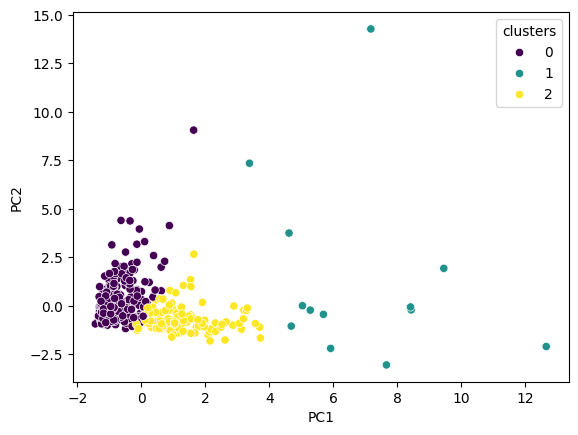

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(X_processed)
df['clusters'] = clusters

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('clusters', axis=1))


pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['clusters'] = df['clusters']

sns.scatterplot(x='PC1', y='PC2', hue='clusters', data=pca_df, palette='viridis')
plt.show()

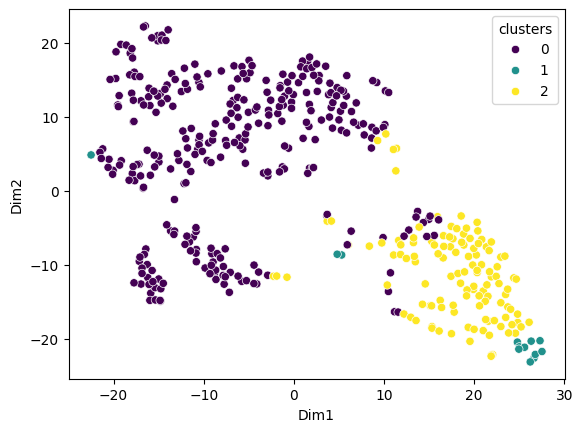

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df.drop('clusters', axis=1))

tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['clusters'] = df['clusters']


sns.scatterplot(x='Dim1', y='Dim2', hue='clusters', data=tsne_df, palette='viridis')
plt.show()
